In [1]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Import dataset
df = pd.read_csv("3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv")
df.head()

,Fiscal Year Released,Recidivism Reporting Year,Main Supervising District,Release Type,Race - Ethnicity,Age At Release,Sex,Offense Classification,Offense Type,Offense Subtype,Return to Prison,Days to Return,Recidivism Type,New Offense Classification,New Offense Type,New Offense Sub Type,Target Population
0,2010,2013,7JD,Parole,Black - Non-Hispanic,25-34,Male,C Felony,Violent,Robbery,Yes,433.0,New,C Felony,Drug,Trafficking,Yes
1,2010,2013,NaN,Discharged – End of Sentence,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,Yes,453.0,Tech,NaN,NaN,NaN,No
2,2010,2013,5JD,Parole,White - Non-Hispanic,35-44,Male,B Felony,Drug,Trafficking,Yes,832.0,Tech,NaN,NaN,NaN,Yes
3,2010,2013,6JD,Parole,White - Non-Hispanic,25-34,Male,B Felony,Other,Other Criminal,No,NaN,No Recidivism,NaN,NaN,NaN,Yes
4,2010,2013,NaN,Discharged – End of Sentence,Black - Non-Hispanic,35-44,Male,D Felony,Violent,Assault,Yes,116.0,Tech,NaN,NaN,NaN,No


In [3]:
# Get a list of column names
list(df.columns)

['Fiscal Year Released',
 'Recidivism Reporting Year',
 'Main Supervising District',
 'Release Type',
 'Race - Ethnicity',
 'Age At Release ',
 'Sex',
 'Offense Classification',
 'Offense Type',
 'Offense Subtype',
 'Return to Prison',
 'Days to Return',
 'Recidivism Type',
 'New Offense Classification',
 'New Offense Type',
 'New Offense Sub Type',
 'Target Population']

In [8]:
# Create new df dropping columns that are not going to be used
clean_df = df.drop(columns = ['Recidivism Reporting Year', 'Main Supervising District', 'Race - Ethnicity', 'Days to Return', 
                    'Recidivism Type', 'New Offense Classification', 'New Offense Type', 'New Offense Sub Type', 
                    'Target Population'])
clean_df.head()

,Fiscal Year Released,Release Type,Age At Release,Sex,Offense Classification,Offense Type,Offense Subtype,Return to Prison
0,2010,Parole,25-34,Male,C Felony,Violent,Robbery,Yes
1,2010,Discharged – End of Sentence,25-34,Male,D Felony,Property,Theft,Yes
2,2010,Parole,35-44,Male,B Felony,Drug,Trafficking,Yes
3,2010,Parole,25-34,Male,B Felony,Other,Other Criminal,No
4,2010,Discharged – End of Sentence,35-44,Male,D Felony,Violent,Assault,Yes


In [9]:
# Change column names to be more usable
clean_df = clean_df.rename(columns={"Fiscal Year Released": "year", "Release Type": "release", "Age At Release ": "age", 
                                    "Sex": "sex", "Offense Classification": "classification", "Offense Type": "type", 
                                    "Offense Subtype": "subtype", "Return to Prison": "reoffend"})
clean_df.head()

,year,release,age,sex,classification,type,subtype,reoffend
0,2010,Parole,25-34,Male,C Felony,Violent,Robbery,Yes
1,2010,Discharged – End of Sentence,25-34,Male,D Felony,Property,Theft,Yes
2,2010,Parole,35-44,Male,B Felony,Drug,Trafficking,Yes
3,2010,Parole,25-34,Male,B Felony,Other,Other Criminal,No
4,2010,Discharged – End of Sentence,35-44,Male,D Felony,Violent,Assault,Yes


In [10]:
# Look at unique values for columns
clean_df.release.unique()

array(['Parole', 'Discharged – End of Sentence', 'Special Sentence', nan,
       'Interstate Compact Parole', 'Parole Granted',
       'Discharged - Expiration of Sentence',
       'Paroled w/Immediate Discharge', 'Paroled to Detainer - Iowa',
       'Paroled to Detainer - U.S. Marshall',
       'Paroled to Detainer - Out of State',
       'Released to Special Sentence', 'Paroled to Detainer - INS'],
      dtype=object)

In [11]:
# Look at unique values for columns
clean_df.classification.unique()

array(['C Felony', 'D Felony', 'B Felony', 'Felony - Enhanced',
       'Aggravated Misdemeanor', 'Other Felony (Old Code)',
       'Serious Misdemeanor', 'Sexual Predator Community Supervision',
       'Simple Misdemeanor', 'Felony - Enhancement to Original Penalty',
       'Special Sentence 2005', 'Felony - Mandatory Minimum',
       'Other Felony', 'A Felony', 'Other Misdemeanor'], dtype=object)

In [12]:
# The way records were kept changed over time. Combine values that are the same but labeled differently.
clean_df2 = clean_df.replace({'release': {'Discharged – End of Sentence': 'Discharged - Expiration of Sentence', 
                                          'Parole': 'Parole Granted', 'Special Sentence': 'Released to Special Sentence'}})

clean_df2 = clean_df2.replace({'classification': {'Other Felony (Old Code)': 'Other Felony'}})

# Replace nan with Unknown
clean_df2['release'].fillna('Unknown', inplace=True)

Text(0.5, 1.0, 'Number of Observations by Sex')

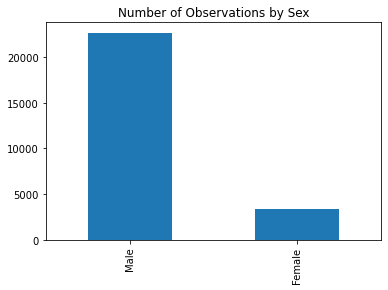

In [18]:
clean_df2.sex.value_counts().plot(kind="bar")
plt.title("Number of Observations by Sex")

Text(0.5, 1.0, 'Number of Observations by Age Group')

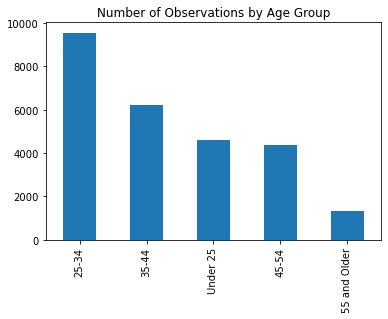

In [19]:
clean_df2.age.value_counts().plot(kind="bar")
plt.title("Number of Observations by Age Group")

In [13]:
# Look to see how many nans are left and replace them with mode values
clean_df2.isna().sum()

# Replace nan in sex with mode
clean_df2['sex'].fillna('Male', inplace=True)

# Replace nan in age with mode
clean_df2['age'].fillna('25-34', inplace=True)

In [14]:
# Create binary target vector indicating if class 0
clean_df2['reoffend'] = clean_df2['reoffend'].replace({"Yes": 0, "No": 1})
clean_df2.head()

,year,release,age,sex,classification,type,subtype,reoffend
0,2010,Parole Granted,25-34,Male,C Felony,Violent,Robbery,0
1,2010,Discharged - Expiration of Sentence,25-34,Male,D Felony,Property,Theft,0
2,2010,Parole Granted,35-44,Male,B Felony,Drug,Trafficking,0
3,2010,Parole Granted,25-34,Male,B Felony,Other,Other Criminal,1
4,2010,Discharged - Expiration of Sentence,35-44,Male,D Felony,Violent,Assault,0


In [20]:
# Change categorical features to numerical values
#categorical data
categorical_cols = ['release', 'age', 'sex', 'classification', 'type', 'subtype'] 

# Use get dummies to one-hot encode the categorical columns
clean_df3 = pd.get_dummies(clean_df2, columns = categorical_cols)
clean_df3

,year,reoffend,release_Discharged - Expiration of Sentence,release_Interstate Compact Parole,release_Parole Granted,release_Paroled to Detainer - INS,release_Paroled to Detainer - Iowa,release_Paroled to Detainer - Out of State,release_Paroled to Detainer - U.S. Marshall,release_Paroled w/Immediate Discharge,...,subtype_Robbery,subtype_Sex,subtype_Sex Offender Registry/Residency,subtype_Special Sentence Revocation,subtype_Stolen Property,subtype_Theft,subtype_Traffic,subtype_Trafficking,subtype_Vandalism,subtype_Weapons
0,2010,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2010,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2010,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2010,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26016,2015,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
26017,2015,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26018,2015,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [21]:
# Move the reoffend column to the last column
clean_df4 = clean_df3[[c for c in clean_df3 if c not in ['reoffend']] 
       + ['reoffend']]
clean_df4

,year,release_Discharged - Expiration of Sentence,release_Interstate Compact Parole,release_Parole Granted,release_Paroled to Detainer - INS,release_Paroled to Detainer - Iowa,release_Paroled to Detainer - Out of State,release_Paroled to Detainer - U.S. Marshall,release_Paroled w/Immediate Discharge,release_Released to Special Sentence,...,subtype_Sex,subtype_Sex Offender Registry/Residency,subtype_Special Sentence Revocation,subtype_Stolen Property,subtype_Theft,subtype_Traffic,subtype_Trafficking,subtype_Vandalism,subtype_Weapons,reoffend
0,2010,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2010,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2010,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2010,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26016,2015,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
26017,2015,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
26018,2015,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


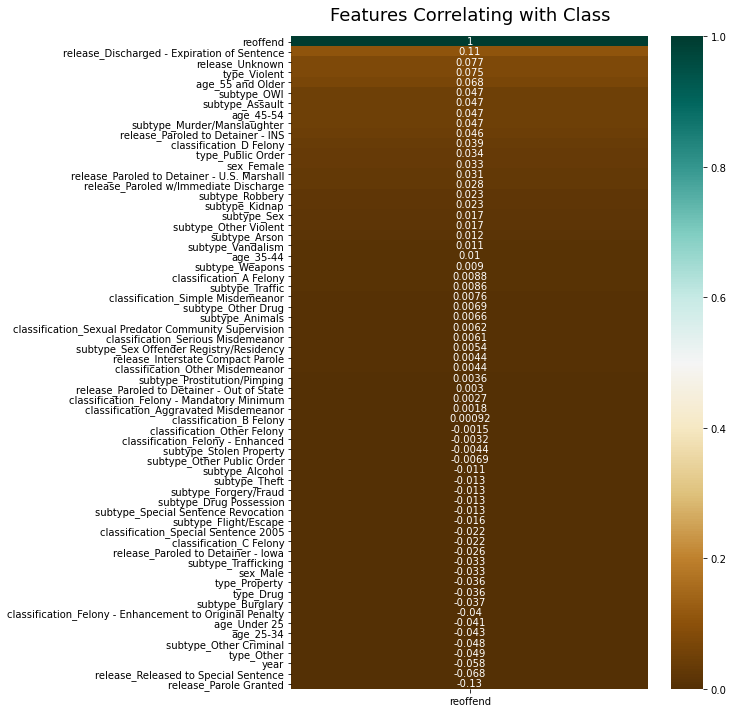

In [22]:
# What I'm interested is any correlation the attributes might have with the Class
# Plot the information above in a visualization
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_df4.corr()[['reoffend']].sort_values(by='reoffend', ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Class', fontdict={'fontsize':18}, pad=16);

In [23]:
# Split data into features and target data
features = clean_df4.iloc[: , :-1]
target = clean_df4.iloc[:,-1:]

In [24]:
# Use KBest to select best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# Select 11 features based on rfecv results with the highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=11)
features_kbest = chi2_selector.fit_transform(features, target)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 63
Reduced number of features: 11


In [25]:
# Look and see what KBest selected as best features
mask = chi2_selector.get_support()
new_features = features.columns[mask]
new_features

Index(['release_Discharged - Expiration of Sentence', 'release_Parole Granted',
       'release_Paroled to Detainer - INS',
       'release_Released to Special Sentence', 'release_Unknown',
       'age_55 and Older', 'type_Other', 'type_Violent',
       'subtype_Murder/Manslaughter', 'subtype_OWI', 'subtype_Other Criminal'],
      dtype='object')

In [26]:
# Create a dataframe from KBest results
Kbest_features = pd.DataFrame(features_kbest, columns=new_features)
Kbest_features

,release_Discharged - Expiration of Sentence,release_Parole Granted,release_Paroled to Detainer - INS,release_Released to Special Sentence,release_Unknown,age_55 and Older,type_Other,type_Violent,subtype_Murder/Manslaughter,subtype_OWI,subtype_Other Criminal
0,0,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
26015,0,0,1,0,0,0,0,1,0,0,0
26016,0,0,0,1,0,0,0,1,0,0,0
26017,0,1,0,0,0,0,0,0,0,0,0
26018,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Use KBest percentile
from sklearn.feature_selection import SelectPercentile

# Select top 30% of features with highest chi2 statistic
chi2_selector = SelectPercentile(chi2, percentile=30)
features_kbest2 = chi2_selector.fit_transform(features, target.values.ravel())

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest2.shape[1])

Original number of features: 63
Reduced number of features: 19


In [29]:
# Get a list of features
mask3 = chi2_selector.get_support()
new_features3 = features.columns[mask3]
new_features3

Index(['release_Discharged - Expiration of Sentence', 'release_Parole Granted',
       'release_Paroled to Detainer - INS',
       'release_Released to Special Sentence', 'release_Unknown', 'age_25-34',
       'age_45-54', 'age_55 and Older', 'age_Under 25', 'sex_Female',
       'classification_Felony - Enhancement to Original Penalty', 'type_Other',
       'type_Public Order', 'type_Violent', 'subtype_Assault',
       'subtype_Burglary', 'subtype_Murder/Manslaughter', 'subtype_OWI',
       'subtype_Other Criminal'],
      dtype='object')

In [30]:
# Create a dataframe from KBest top 25 Percentile results
Kbest_features2 = pd.DataFrame(features_kbest2, columns=new_features3)
Kbest_features2

,release_Discharged - Expiration of Sentence,release_Parole Granted,release_Paroled to Detainer - INS,release_Released to Special Sentence,release_Unknown,age_25-34,age_45-54,age_55 and Older,age_Under 25,sex_Female,classification_Felony - Enhancement to Original Penalty,type_Other,type_Public Order,type_Violent,subtype_Assault,subtype_Burglary,subtype_Murder/Manslaughter,subtype_OWI,subtype_Other Criminal
0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
26016,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
26017,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
26018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# Train Test Split
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(Kbest_features2, target, test_size =0.3, random_state=11)

In [32]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  18214
No. of samples in validation set: 7806


In [33]:
# Check if training target vector had imbalanced classes
y_train['reoffend'].value_counts()

1    12186
0     6028
Name: reoffend, dtype: int64

In [41]:
# Create baseline regression model for comparison
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(X_train, y_train.values.ravel())
dummy.score(X_val, y_val.values.ravel())

0.4994875736612862

In [48]:
# Build Logistic Regression Model accounting for imbalanced classes

# Create logistic regression object
logit = LogisticRegression(random_state=0, class_weight="balanced", max_iter=1000)

# Train Model
model = logit.fit(X_train, y_train.values.ravel())

# Get R-squared score for model
model.score(X_val, y_val.values.ravel())

0.5918524212144505

In [45]:
# Check the cross validation scores for logit model
from sklearn.model_selection import cross_val_score

# Cross-validate using accuracy
cross_val_score(model, Kbest_features2, target.values.ravel(), scoring="accuracy")

array([0.58474251, 0.57225211, 0.57378939, 0.59665642, 0.57590315])

In [46]:
# Get the mean cv accuracy 
cross_val_score(model, Kbest_features2, target.values.ravel(), scoring="accuracy").mean()

0.5806687163720216

In [37]:
# Use GridSearch CV to tune hyperparameters
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

# Create logistic regression
logistic = linear_model.LogisticRegression()


#Create hyperparameter candidates 
class_weight=["balanced"]
max_iter=[1000]
penalty = ['l1', 'l2']
C = np.logspace(100, 10, 4, 2, 1)
solver = ['lbfgs', 'liblinear']

# Create dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty, solver=solver, class_weight=class_weight, max_iter=max_iter)

# Create grid search
gridsearch = GridSearchCV(logistic, hyperparameters, cv = 5, verbose=True, n_jobs=-1)

# Fit grid search
best_model = gridsearch.fit(features, target.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  65 out of  80 | elapsed:   17.8s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   23.3s finished


In [38]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])

Best Penalty: l2
Best C: 1.0
Best Solver: liblinear


In [39]:
# Use the results from the Gridsearch and train a model to see if results improve

# Create logistic regression object
logit2 = LogisticRegression(random_state=0, class_weight="balanced", max_iter=1000, solver='liblinear')

# Train Model
model2 = logit2.fit(X_train, y_train.values.ravel())

# Get R-squared score for model
model2.score(X_val, y_val.values.ravel())

0.5918524212144505

In [40]:
# Check the cross validation scores for logit model
from sklearn.model_selection import cross_val_score

# Cross-validate using accuracy
cross_val_score(model2, Kbest_features2, target.values.ravel(), scoring="accuracy")

array([0.58474251, 0.57225211, 0.57378939, 0.59665642, 0.57590315])

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


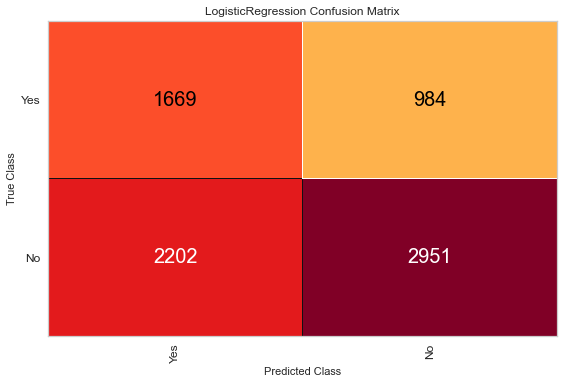

In [42]:
from yellowbrick.classifier import ConfusionMatrix
# fit the model and view confusion matrix results
classes = ['Yes','No']
cm = ConfusionMatrix(model, classes=classes, percent=False)
cm.fit(X_train, y_train.values.ravel())

# Use the test data to make predictions and score the results
cm.score(X_val, y_val.values.ravel())

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


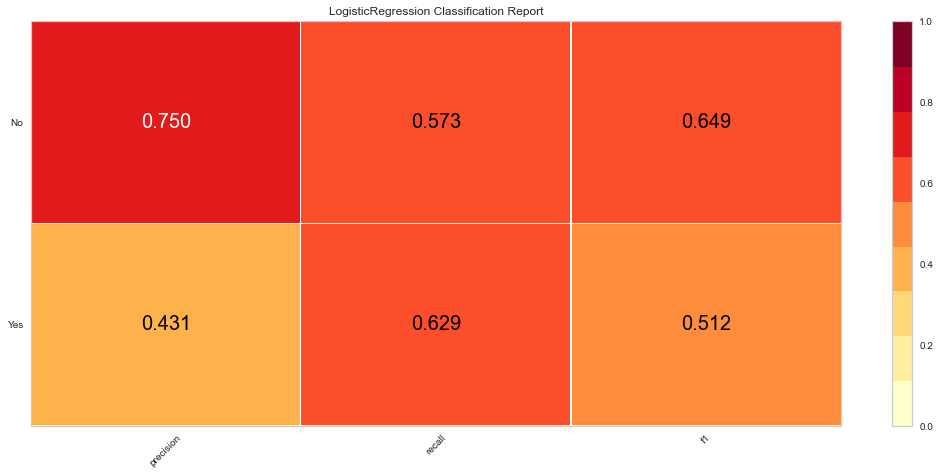

In [43]:
# Check the Precision, Recall, and F1 Score
from yellowbrick.classifier import ClassificationReport

# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train.values.ravel())  # Fit the training data to the visualizer
visualizer.score(X_val, y_val.values.ravel())  # Evaluate the model on the test data
g = visualizer.poof()

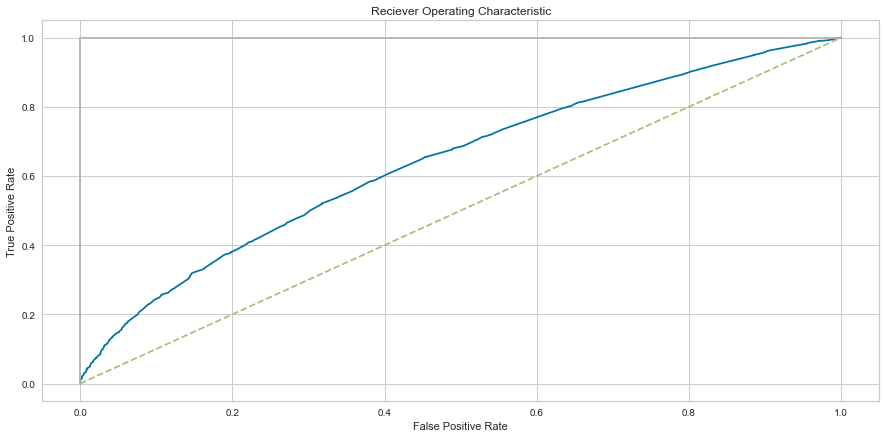

In [54]:
# Create a ROC Curve visual
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
target_probabilities = logit.predict_proba(X_val)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_val.values.ravel(), target_probabilities)

# Plot ROC curve
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(([0, 1]), ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot ([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [55]:
# Calculate area under curve
roc_auc_score(y_val.values.ravel(), target_probabilities)

0.6407727167227871